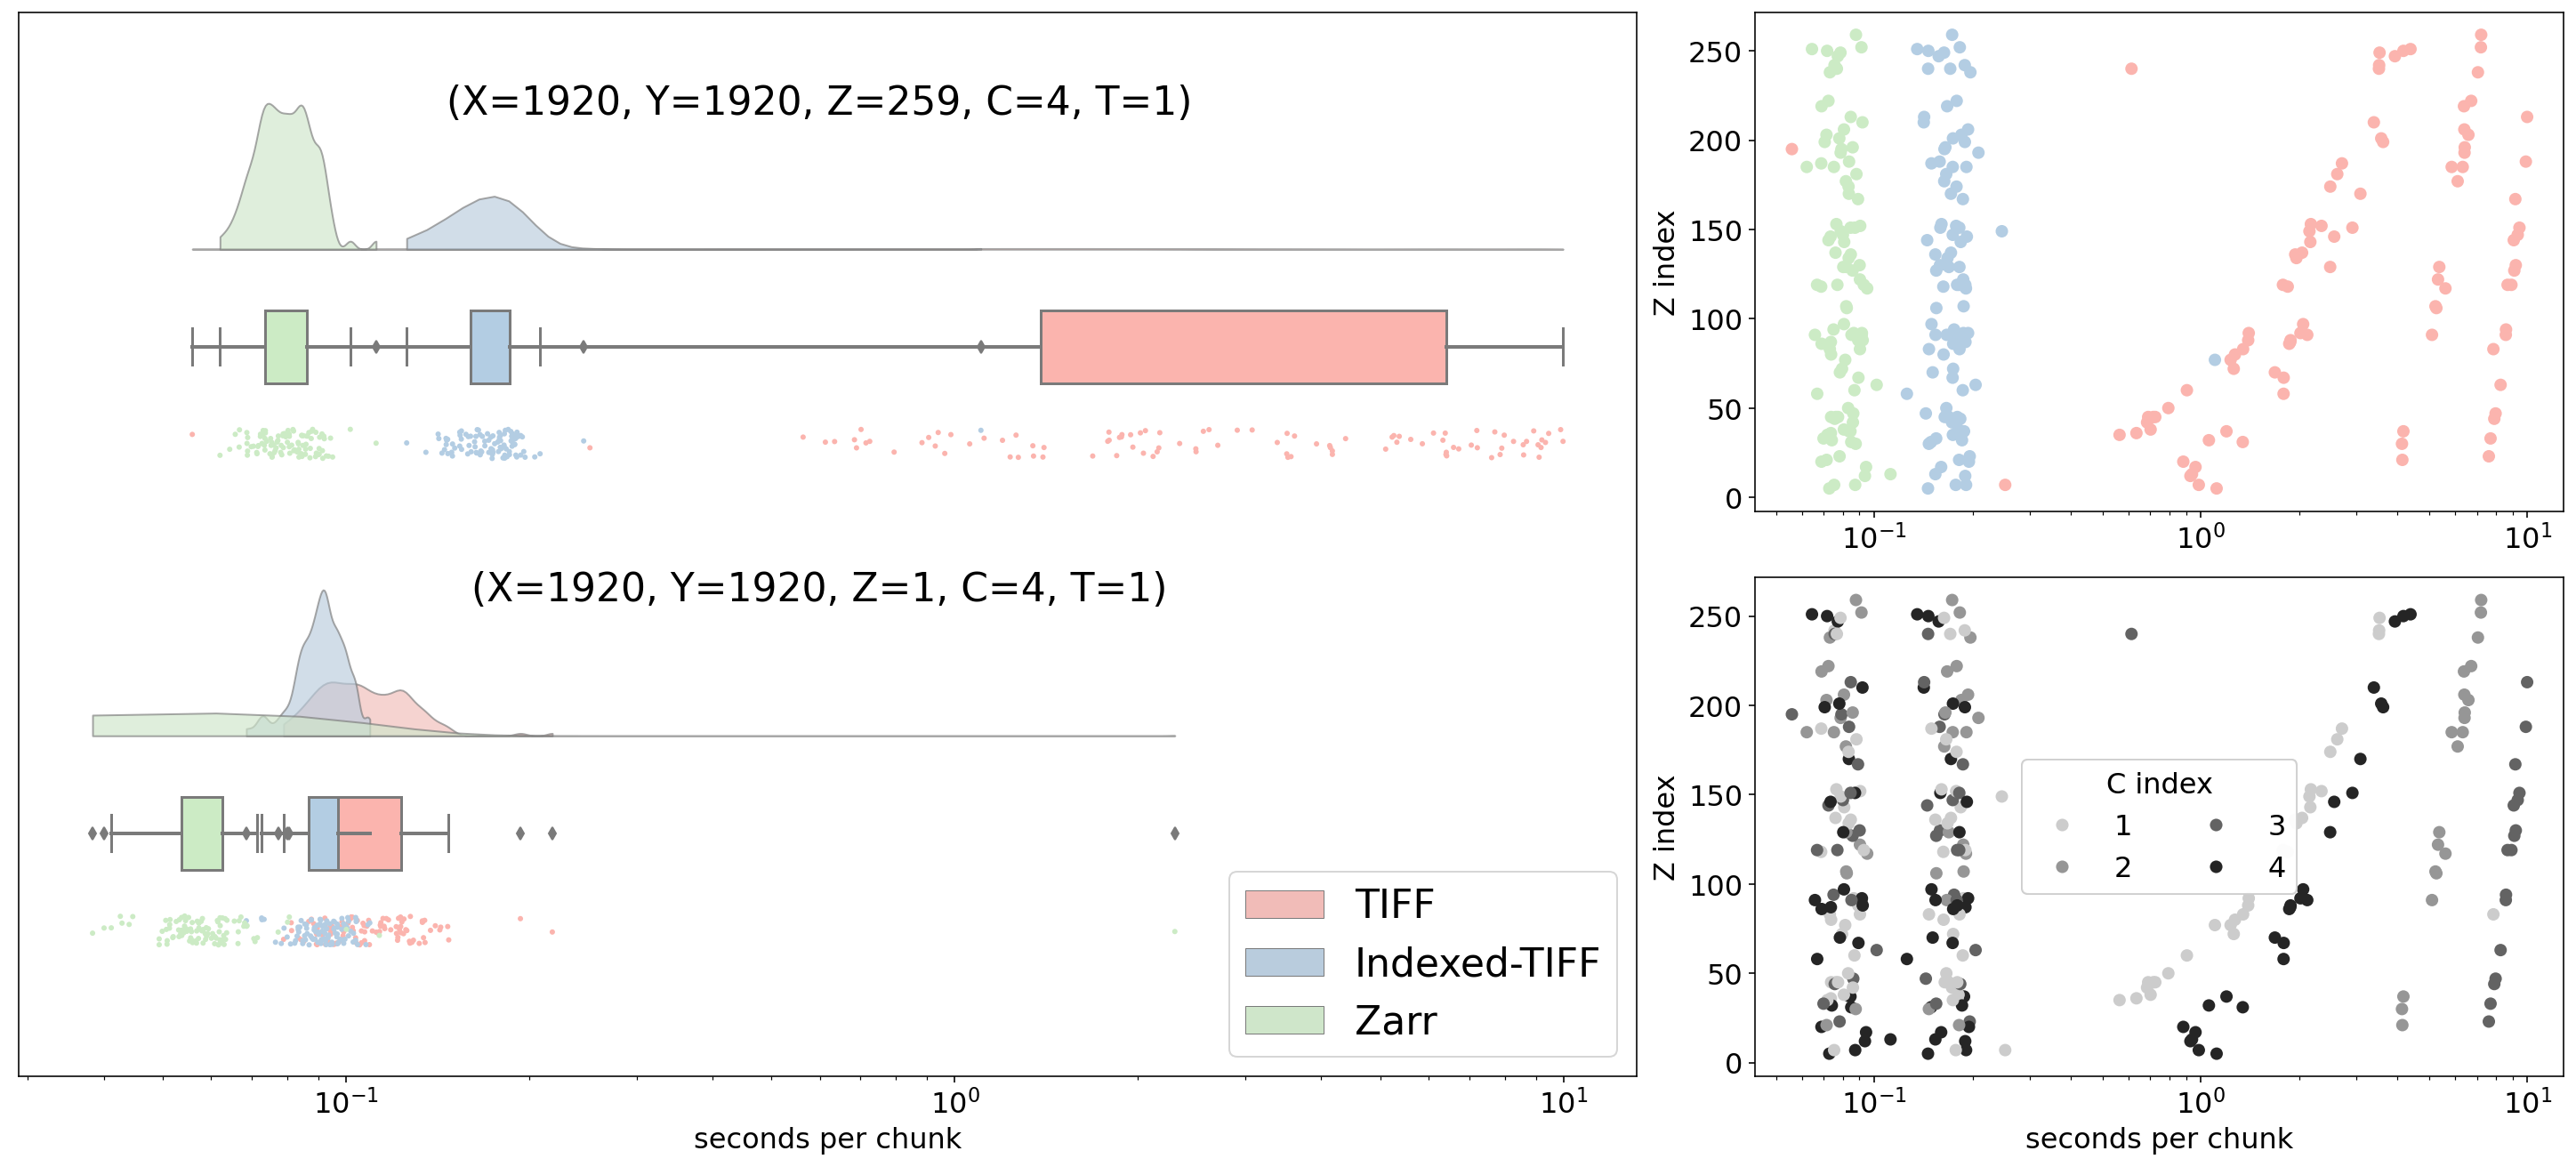

In [2]:
from pathlib import Path

import pandas as pd
import ptitprince as pt

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

%matplotlib inline  
%config InlineBackend.figure_format = 'retina'

f = plt.figure(constrained_layout=True, figsize=(20, 9))
gs = f.add_gridspec(2, 3)

ax = f.add_subplot(gs[:,:2])
ax1 = f.add_subplot(gs[0,2])
ax2 = f.add_subplot(gs[1,2])

cmap = plt.get_cmap('Pastel1')
font = 16
fontlarge = 22

here = Path.cwd()
z259 = pd.read_csv(here / 'XY-1920-Z-259-C-4-T-1-XC-256.csv')
z1 = pd.read_csv(here / 'XY-1920-Z-1-C-4-T-1-XC-256.csv')

ax = pt.RainCloud(
    x="name",
    y="seconds",
    hue="type",
    data=pd.concat((z259, z1)),
    palette=cmap.name,
    width_viol=0.6,
    ax=ax,
    orient="h",
    alpha=0.65,
    jitter=0.03,
    move=0.2,
)

ax.set_xscale("log")
ax.set_xlabel("seconds per chunk")
ax.yaxis.set_visible(False)


# add text
offset = 0.6
ax.text(offset, -0.5, '(X=1920, Y=1920, Z=259, C=4, T=1)', ha='center', va='center', fontsize=fontlarge)
ax.text(offset, 0.5, '(X=1920, Y=1920, Z=1, C=4, T=1)', ha='center', va='center', fontsize=fontlarge)

ax.axes.get_yaxis().get_label().set_visible(False)
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[0:3], labels[0:3], loc="lower right", fontsize=fontlarge)


ax1.set_ylabel('Z index')
ax1.set_xscale('log')
ax1.scatter(
    z259.seconds,
    z259.z,
    c=z259.type.map({ 
      name: cmap.colors[i] 
      for i, name in 
      enumerate(z259.type.unique())
    }),
)

ax2.set_ylabel('Z index')
ax2.set_xlabel('seconds per chunk')
ax2.set_xscale('log')
scatter = ax2.scatter(
    z259.seconds,
    z259.z,
    c=z259.c.astype('category'),
    cmap=ListedColormap(["#cccccc", "#969696", "#636363", "#252525"])
)

legend1 = ax2.legend(
    *scatter.legend_elements(),
    title="C index",
    ncol=2,
    loc='center',
    fontsize=font,
    title_fontsize=font
)

ax2.add_artist(legend1)

# bump fontsize for each element
for a in [ax, ax1, ax2]:
    for item in (
        [a.title, a.xaxis.label, a.yaxis.label]
        + a.get_xticklabels()
        + a.get_yticklabels()
    ):
        item.set_fontsize(font)

In [7]:
f.savefig('supp_fig2.png', dpi=300)